## Project Code

In [3]:
library(repr)
library(tidyverse)
library(tidymodels)
install.packages("corrplot")
library(corrplot)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [7]:
data = read_csv("WineQT.csv")
data <- data[, c(13, 1, 2, 3,4,5,6,7,8,9,10,11,12)]
data

Rows: 1143 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (13): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5


In [8]:
corr <- cor(data)
round(corr, 2)

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,1.00,-0.28,-0.01,-0.14,-0.05,-0.09,0.10,-0.11,-0.36,0.13,-0.10,0.24,0.07
fixed acidity,-0.28,1.00,-0.25,0.67,0.17,0.11,-0.16,-0.11,0.68,-0.69,0.17,-0.08,0.12
volatile acidity,-0.01,-0.25,1.00,-0.54,-0.01,0.06,0.00,0.08,0.02,0.22,-0.28,-0.20,-0.41
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
sulphates,-0.10,0.17,-0.28,0.33,0.02,0.37,0.03,0.03,0.14,-0.19,1.00,0.09,0.26
alcohol,0.24,-0.08,-0.20,0.11,0.06,-0.23,-0.05,-0.19,-0.49,0.23,0.09,1.00,0.48
quality,0.07,0.12,-0.41,0.24,0.02,-0.12,-0.06,-0.18,-0.18,-0.05,0.26,0.48,1.00


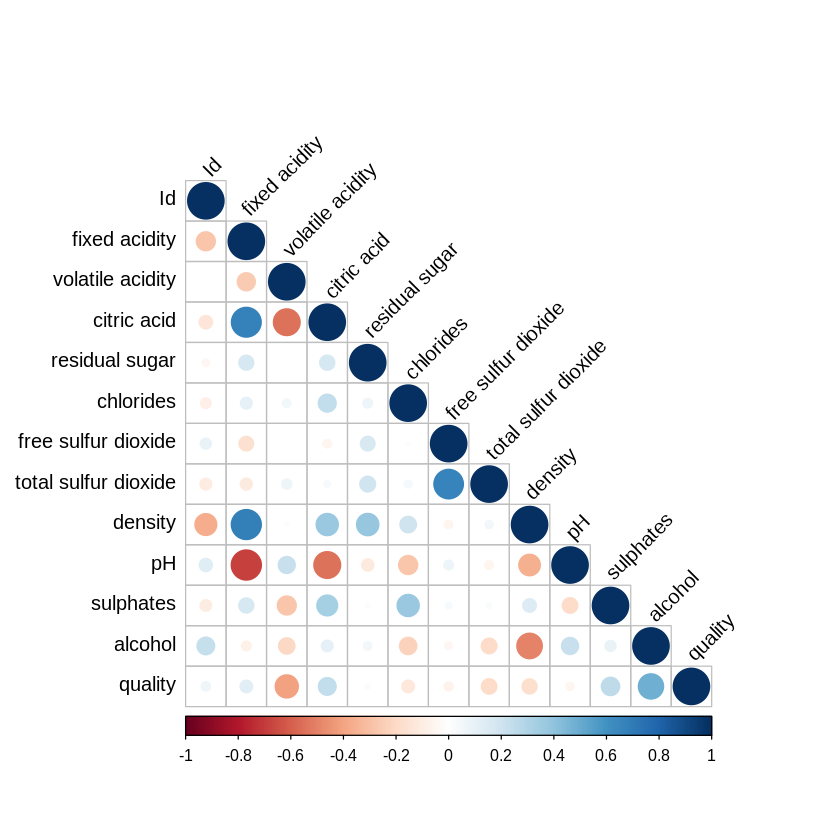

In [10]:
corrplot(corr, type = "lower", 
         tl.col = "black", tl.srt = 45 )